Seepage rate through different clogged streambeds (of equal shape parameter) are computed as function of the clogging thickness. The curves are shown to collapse under relevant rescaling. Both van Genuchten - Mualem and Brooks - Corey - Burdine models are considered.

In [26]:
# Standard imports
from itertools import product
from pathlib import Path

# Third party imports
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

# Internal imports
from rate import q0_exact

In [27]:
# set plot style
plt.style.use('plot_style.txt')

# output path for figures 
output_path = Path("/home/jonas/shared/Work/SSeep2026/Figures")

Compute seepage rate for five different configurations

In [28]:
cl_th = np.logspace(-5, 4, 200)
cl_cond = [1e-5, 1e-7, 3e-4, 2e-7, 3e-6]
aq_cond = [1e-4, 3e-3, 1e-3, 1e-5, 7e-4]
aq_scale = [0.1, 0.3, 0.5, 0.05, 1]

b = 3.25
aq_shape_vGM = (2 * b + 1) / 5
aq_shape_BCB = (b - 2) / 3

q_vGM = dict()
q_BCB = dict()
for i in range(5):
    q_vGM[i] = np.array([q0_exact(cl_cond[i], x, aq_cond[i], aq_scale[i],
                        aq_shape_vGM, aq_para='vGM') for x in cl_th])
    
    q_BCB[i] = np.array([q0_exact(cl_cond[i], x, aq_cond[i], aq_scale[i],
                        aq_shape_BCB, aq_para='BCB') for x in cl_th])

Plot seepage rate against clogging thickness

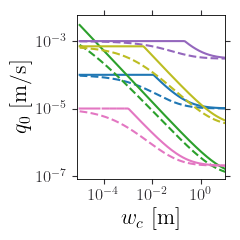

In [29]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

# set colors
cmap = cm.tab10
norm = colors.Normalize(vmin=0, vmax=5)

for i in range(5):
    c = cmap(norm(i))
    ax.plot(cl_th, q_vGM[i], c=c, ls='--', lw=1.5)
    ax.plot(cl_th, q_BCB[i], c=c, ls='-', lw=1.5)

# layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='log', yscale='log')
    
ax.set_xlim(xmin=0.8e-5, xmax=1e1)
ax.set_ylim(ymin=8e-8, ymax=.6e-2)
ax.set_xticks([1e-4, 1e-2, 1e0])
ax.set_yticks([1e-7, 1e-5, 1e-3])
ax.set_xlabel("$w_c$ [m]", fontsize=16)
ax.set_ylabel("$q_0$ [m/s]", fontsize=16)
ax.minorticks_off()

plt.tight_layout()
plt.savefig(output_path / "curve-collapse-before.pdf")

Plot normalized seepage rate ($q / K_a$) against the dimensionless ratio $x = B^{-1/b} w_c K_a / h_g K_c$

In [ ]:
def log_log_triangle(x1, x2, y1, y2=None, slope=None):
    """
    Draw a triangle in a log-log plot.

    Parameters:
    -----------
    x1: float
        x coordinate of the base/diagonal vertex.
    x2: float
        x coordinate of the top vertex.
    y1: float
        y coordinate of the base.
    y2: float, optional
        y coordinate of the top vertex. If none computed fromt eh slope. Default
        is None.
    slope: float, optional
        Diagonal slope. If None, y2 must be specified. Default is None.
    """

    if y2 is None and slope is None:
        raise ValueError("Either y2 or slope must be specified")

    if y2 is None:
        y2 = y1 * (x2 / x1) ** slope

    plt.plot([x1, x2, x2, x1], [y1, y2, y1, y1], "k-")

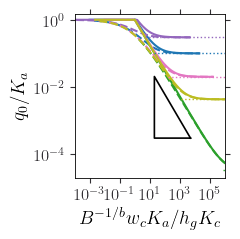

In [31]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

xmin, xmax = 1e-4, 1e6

B_vGM = (1 - 1 / aq_shape_vGM)**2
B_BCB = 1

# set colors
cmap = cm.tab10
norm = colors.Normalize(vmin=0, vmax=5) 

for i in range(5):
    c = cmap(norm(i))

    x_sh = (aq_cond[i] / cl_cond[i])**(1+1/b)

    x_vGM = B_vGM**(-1/b) * cl_th * aq_cond[i] / (aq_scale[i] * cl_cond[i])
    ax.plot(x_vGM[x_vGM<1e3*x_sh], q_vGM[i][x_vGM<1e3*x_sh] / aq_cond[i],
            c=c, ls='--', lw=1.5, zorder=0)
    
    x_BCB = B_BCB**(-1/b) * cl_th * aq_cond[i] / (aq_scale[i] * cl_cond[i])
    ax.plot(x_BCB[x_BCB<1e3*x_sh], q_BCB[i][x_BCB<1e3*x_sh] / aq_cond[i],
            c=c, ls='-', lw=1.5, zorder=0)
    
    ax.axhline(cl_cond[i] / aq_cond[i],
               xmin=np.log10(x_sh/xmin) / np.log10(xmax/xmin),
               color=c, lw=1, ls=':')

# plot predicted slope
log_log_triangle(5e3, 2e1, 3e-4, slope=-(b/(1+b)))

# layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='log', yscale='log')

ax.set_xlabel("$B^{-1/b} w_c K_a / h_g K_c$", fontsize=14)
ax.set_ylabel("$q_0 / K_a$", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_xticks([1e-3, 1e-1, 1e1, 1e3, 1e5])
ax.set_yticks([1e-4, 1e-2, 1e0])
ax.set_ylim(ymin=2e-5, ymax=1.5e0)

ax.minorticks_off()

plt.tight_layout()
plt.savefig(output_path / "curve-collapse-after.pdf")